In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import json
plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 

In [2]:
def left(pos, dim, n):
    if pos <= int(n/2):
        return (2**dim)**pos
    else:
        return (2**dim)**(n-pos)

In [3]:
def right(pos, dim, n):
    if pos < int(n/2):
        return (2**dim)**(pos+1)
    else:
        return (2**dim)**(n-pos-1)

In [4]:
def left_right(pos, dim, n, chi):
    l = left(pos, dim, n)
    if l > chi:
        l = chi
    r = right(pos, dim, n)
    if r > chi:
        r = chi
    
    return l, r

In [5]:
def mps(dim, n, chi):
    parameter_mps = 0
    for pos in range(n):
        l, r = left_right(pos, dim, n, chi)
        parameter_mps += 2**dim*l*r
    
    return parameter_mps

In [6]:
def mps_independent(dim, n, chi):
    parameter_mps = 0
    for pos in range(n):
        l, r = left_right(pos, dim, n, chi)
        parameter_mps += 2**dim*l*r
        if pos > 0 and pos < n-1:
            parameter_mps -= r**2
    
    return parameter_mps

In [7]:
def max_tensor(dim, chi):
    return 2**dim*chi**2

In [8]:
def hadamard_mpo(dim, n, chi, chi_mpo):
    if chi > chi_mpo:
        chi = chi_mpo
    parameter_mpo = 0
    for pos in range(n):
        l, r = left_right(pos, dim, n, chi)
        parameter_mpo += (2**dim)**2*l*r
    
    return parameter_mpo

In [9]:
def d(dim, n):
    params = 1*4*3*4 + 3*4*5*4 + 5*4*1*4 + (n-3)*3*4*3*4

    return params

In [10]:
def big_mpo(dim, n, chi_mpo):
    params = 1*4*chi_mpo*4*2 + (n-2)*chi_mpo**2*4*4

    return params

In [11]:
def mps_mps_lr(dim, n, chi):
    params = 0
    for pos in range(n):
        l, r = left_right(pos, dim, n, chi)
        params += l*l
    
    return params

In [12]:
def mps_mpo_mps_lr(dim, n, chi, chi_mpo):
    params = 1
    for pos in range(1, n):
        l, r = left_right(pos, dim, n, chi)
        params += l*l*chi_mpo
    
    return params

In [13]:
def total_params(dim, n, chi, chi_mpo):
    if chi > 2**n:
        chi = 2**n
    if chi_mpo > 2**n:
        chi_mpo = 2**n
    params = np.longdouble(0)
    params += np.longdouble(6*mps(dim, n, chi))
    params += np.longdouble(4*max_tensor(dim, chi))
    params += np.longdouble(2*hadamard_mpo(dim, n, chi, chi_mpo))
    params += np.longdouble(7*big_mpo(dim, n, chi_mpo))
    params += np.longdouble(4*d(dim, n))
    params += np.longdouble(4*mps_mps_lr(dim, n, chi))
    params += 30*np.longdouble(mps_mpo_mps_lr(dim, n, chi, chi_mpo))

    return params

In [14]:
def total_params_DNS_2D(n):
    return 28*2**n*2**n

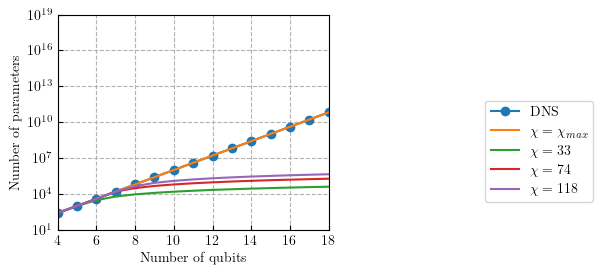

In [16]:
n_list = np.arange(4, 19)
params_DNS = []
params_n = []
params_chi_33 = []
params_chi_74 = []
params_chi_118 = []
for n in n_list:
    params_DNS.append(2**n*2**n)
    params_n.append(mps_independent(2, n, 2**n))
    params_chi_33.append(mps_independent(2, n, 33))
    params_chi_74.append(mps_independent(2, n, 74))
    params_chi_118.append(mps_independent(2, n, 118))
fig, ax = plt.subplots(figsize=(3.5, 2.8))
plt.plot(n_list, params_DNS, label='DNS', marker='o')
plt.plot(n_list, params_n, label='$\chi = \chi_{max}$')
plt.plot(n_list, params_chi_33, label='$\chi = 33$')
plt.plot(n_list, params_chi_74, label='$\chi = 74$')
plt.plot(n_list, params_chi_118, label='$\chi = 118$')
ax.set_yscale('log')
ax.grid(True, which="both", ls="--", c='0.7')
ax.tick_params(which='both', direction="in")
ax.set_xlim([4, 18])
ax.set_ylim([1e1, 1e19])
ax.set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
# ax.set_yticks([2, 4**1, 4**2, 2*4**2])
plt.xlabel('Number of qubits')
plt.ylabel('Number of parameters')
plt.legend(loc='lower right', bbox_to_anchor=(2, 0.1), ncol=1, fancybox=True)
plt.savefig("memory_scaling_only_state.pdf", bbox_inches="tight")
plt.show()

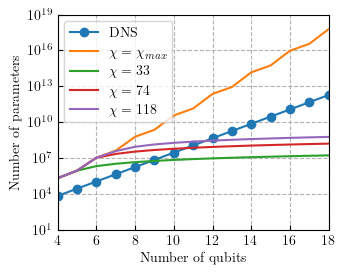

In [19]:
n_list = np.arange(4, 19)
params_DNS = []
params_n = []
params_chi_33 = []
params_chi_74 = []
params_chi_118 = []
for n in n_list:
    params_DNS.append(total_params_DNS_2D(n))
    params_n.append(total_params(2, n, 2**n, 2**n))
    params_chi_33.append(total_params(2, n, 33, 33))
    params_chi_74.append(total_params(2, n, 74, 74))
    params_chi_118.append(total_params(2, n, 118, 118))
fig, ax = plt.subplots(figsize=(3.5, 2.8))
plt.plot(n_list, params_DNS, label='DNS', marker='o')
plt.plot(n_list, params_n, label='$\chi = \chi_{max}$')
plt.plot(n_list, params_chi_33, label='$\chi = 33$')
plt.plot(n_list, params_chi_74, label='$\chi = 74$')
plt.plot(n_list, params_chi_118, label='$\chi = 118$')
ax.set_yscale('log')
ax.grid(True, which="both", ls="--", c='0.7')
ax.tick_params(which='both', direction="in")
ax.set_xlim([4, 18])
ax.set_ylim([1e1, 1e19])
ax.set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
plt.xlabel('Number of qubits')
plt.ylabel('Number of parameters')
plt.legend()
plt.savefig("memory_scaling_all.pdf", bbox_inches="tight")
plt.show()

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_83377/4125924305.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


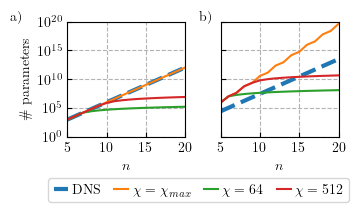

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True,  gridspec_kw={'wspace': 0.3})

chi_list = [64, 512]
n_list = np.arange(5, 21)

params_DNS = []
params_n = []
params_chi = {}
for n in n_list:
    params_DNS.append(2**n*2**n)
    params_n.append(mps_independent(2, n, 2**n))
    for chi in chi_list:
        if chi in params_chi.keys():
            params_chi[chi].append(mps_independent(2, n, chi))
        else:
            params_chi[chi] = [mps_independent(2, n, chi)]
ax[0].plot(n_list, params_DNS, label='DNS', marker='', ls='--', lw=3)
ax[0].plot(n_list, params_n, label='$\chi = \chi_{max}$')
for chi, params in params_chi.items():
    ax[0].plot(n_list, params, label=rf"$\chi = {chi}$")
ax[0].set_yscale('log')
ax[0].grid(True, which="both", ls="--", c='0.7')
ax[0].tick_params(which='both', direction="in")
ax[0].set_xlim([5, 20])
# ax[0].set_ylim([1e1, 1e19])
ax[0].set_xticks([5, 10, 15, 20])
# ax.set_yticks([2, 4**1, 4**2, 2*4**2])
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$\#$ parameters')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.25, 0.9, "a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

params_DNS = []
params_n = []
params_chi = {}
for n in n_list:
    params_DNS.append(total_params_DNS_2D(n))
    params_n.append(total_params(2, n, 2**n, 2**n))
    # if n < 20:
    #     params_n.append(total_params(2, n, 2**n, 2**n))
    # else:
    #     params_n.append(None)
    for chi in chi_list:
        if chi in params_chi.keys():         
            params_chi[chi].append(total_params(2, n, chi, chi))
        else:
            params_chi[chi] = [total_params(2, n, chi, chi)]
ax[1].plot(n_list, params_DNS, label='DNS', marker='', ls='--', lw=3)
ax[1].plot(n_list, params_n, label='$\chi = \chi_{max}$')
for chi, params in params_chi.items():
    ax[1].plot(n_list, params, label=rf"$\chi = {chi}$")
ax[1].set_yscale('log')
ax[1].grid(True, which="both", ls="--", c='0.7')
ax[1].tick_params(which='both', direction="in")
ax[1].set_xlim([5, 20])
ax[1].set_ylim([1, 1e20])
ax[1].set_yticks([1e0, 1e5, 1e10, 1e15, 1e20])
ax[1].set_xticks([5, 10, 15, 20])
ax[1].set_xlabel(r'$n$')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.05, 0.9, "b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# ax[1].plot([0, 25], [80*8e9/64]*2, ls='-', lw=1)
# ax[1].set_ylabel(r'$\#$ parameters')

fig.legend(*ax[1].get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, fancybox=True, handlelength=1, handletextpad=0.3, columnspacing=1)
fig.tight_layout()
plt.savefig("memory_scaling.pdf", bbox_inches="tight")
plt.show()